In [1]:
from google.colab import files
uploaded = files.upload()


Saving digit-recognizer.zip to digit-recognizer.zip


In [6]:
import zipfile
import os

zip_file_path = next(iter(uploaded))
unzip_dir = './unzipped/'


if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


extracted_files = os.listdir(unzip_dir)
print("Extracted files:", extracted_files)


Extracted files: ['train.csv', 'test.csv', 'sample_submission.csv']


In [7]:
import pandas as pd
import os

train_csv_path = os.path.join(unzip_dir, 'train.csv')
df_train = pd.read_csv(train_csv_path)

# Displ
print(df_train.head())



   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


In [8]:

X = df_train.drop('label', axis=1).values
y = df_train['label'].values

In [9]:

X = X.reshape(-1, 28, 28, 1)


X = X / 255.0

In [10]:
y = to_categorical(y, num_classes=10)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9445 - loss: 0.1862 - val_accuracy: 0.9760 - val_loss: 0.0777
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 126ms/step - accuracy: 0.9662 - loss: 0.1113 - val_accuracy: 0.9793 - val_loss: 0.0647
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 115ms/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.9805 - loss: 0.0675 - val_accuracy: 0.9850 - val_loss: 0.0433
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.9804 - loss: 0.0616 - val_accuracy: 0.9874 - val_loss: 0.0410
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9861 - loss: 0.0460 - val_accuracy: 0.9883 - val_loss: 0.0349
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9882 - val_loss: 0.0367
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step - accuracy: 0.9878 - loss: 0

In [16]:

val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9902 - loss: 0.0321
Validation Accuracy: 99.06%


In [17]:

test_csv_path = os.path.join(unzip_dir, 'test.csv')
test_df = pd.read_csv(test_csv_path)


X_test = test_df.values.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0


In [18]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


In [19]:

submission = pd.DataFrame({'ImageId': list(range(1, len(predicted_classes) + 1)), 'Label': predicted_classes})


submission.to_csv('submission.csv', index=False)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)


model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 54ms/step - accuracy: 0.9131 - loss: 0.2925 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.9601 - loss: 0.1360 - val_accuracy: 0.9899 - val_loss: 0.0322
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.9671 - loss: 0.1169 - val_accuracy: 0.9899 - val_loss: 0.0298
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9717 - loss: 0.0937 - val_accuracy: 0.9927 - val_loss: 0.0242
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.9741 - loss: 0.0889 - val_accuracy: 0.9896 - val_loss: 0.0322
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9767 - loss: 0.0813 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.9784 - loss: 0.0732 - val_accuracy: 0.9930 - val_loss: 0.0226
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9778 - loss: 0.07

In [28]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step


In [29]:
submission_df = pd.DataFrame({
    'ImageId': list(range(1, len(predicted_labels) + 1)),
    'Label': predicted_labels
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)


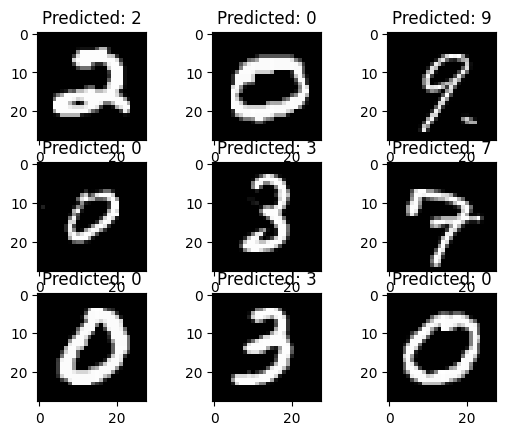

In [30]:


import matplotlib.pyplot as plt

# Plot some test images and their predicted labels
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title(f"Predicted: {predicted_labels[i]}")
plt.show()
